In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

In [88]:
df=pd.read_excel('input/SCKCEN Dataset -2.xlsx')

df.dropna(inplace=True)
df['data'] = df['data'].map({'YES': 1, 'NO': 0})
df


,Lab,T,a,W,B,b,da,Kjc,ys,e,klim,data,kjc1T
0,GKSS,-154,14.47,25,12.5,10.53,0.00,54.8,674.5,237.6,237.2,1,54.8
1,GKSS,-154,14.17,25,12.5,10.83,0.00,49.8,674.5,237.6,240.5,1,49.8
2,GKSS,-154,14.15,25,12.5,10.85,0.00,37.8,674.5,237.6,240.8,1,37.8
3,GKSS,-154,14.36,25,12.5,10.64,0.00,33.0,674.5,237.6,238.4,1,33.0
4,GKSS,-154,14.06,25,12.5,10.94,0.00,38.9,674.5,237.6,241.8,1,38.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,GKSS,0,113.65,200,100.0,86.35,0.41,307.6,473.3,227.5,556.7,1,307.6
642,GKSS,0,111.81,200,100.0,88.19,0.81,383.0,473.3,227.5,562.6,1,383.0
643,GKSS,0,113.63,200,100.0,86.37,0.57,332.6,473.3,227.5,556.8,1,332.6
644,GKSS,0,112.54,200,100.0,87.46,0.00,223.6,473.3,227.5,560.3,1,223.6


Mean Squared Error: 407.47615561967615
Mean Absolute Error: 12.84150740877105
R2 Score: 0.9502765884434095
Root Mean Squared Error: 20.186038631184577


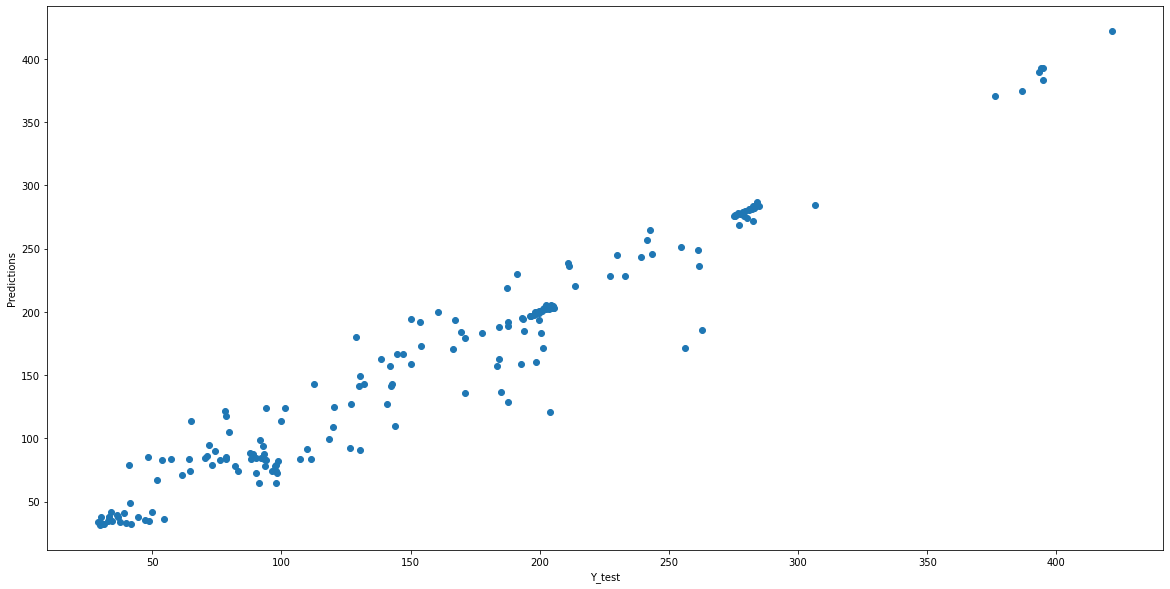

In [89]:
#including all values in the dataset


#dropping not useful columns using random forest regressor

X=df.drop(['Kjc','klim','Lab','kjc1T'],axis=1)
y=df['kjc1T']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf=RandomForestRegressor()

rf.fit(X_train,y_train)

predictions=rf.predict(X_test)

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
rms=math.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rms}')

plt.figure(figsize=(20,10))

plt.scatter(y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.savefig('Y_testVSPredictions.png',dpi=100)

In [90]:
#combining all the test dataset
df1=pd.DataFrame({'Y-test':np.array(y_test.values),'predictions':np.array(predictions)})

print("DF1")
print(df1)

print("DF2")
df2=X_test
print(df2)

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df3 = pd.concat( [df1, df2], axis=1) 

print("CONCATENATED")
print(df3)

df3.rename(columns={"Y-test": "trueValue"},inplace=True)

DF1
     Y-test  predictions
0     193.7   194.592000
1     171.0   135.964000
2     203.9   120.390000
3      74.2    89.571136
4     184.4   162.402000
..      ...          ...
189   205.2   203.134000
190    41.2    79.122250
191   256.4   171.407000
192    61.5    70.789258
193    96.2    73.765939

[194 rows x 2 columns]
DF2
       T      a   W     B      b    da     ys      e  data
530    0  14.55  25  12.5  10.45  2.45  473.3  227.5     0
306  -40  13.63  25  12.5  11.37  0.08  492.0  230.1     1
280  -60  27.86  50  25.0  22.14  0.00  506.4  231.4     1
133 -110  14.36  25  12.5  10.64  0.00  567.6  234.7     1
473  -20  29.33  50  25.0  20.67  0.09  481.3  228.8     1
..   ...    ...  ..   ...    ...   ...    ...    ...   ...
556    0  13.27  25  12.5  11.73  2.61  473.3  227.5     0
121 -110  14.00  25  12.5  11.00  0.00  567.6  234.7     1
362  -40  28.17  50  25.0  21.83  0.00  492.0  230.1     1
117 -110  14.14  25  12.5  10.86  0.00  567.6  234.7     1
108 -110  14.27  25

In [91]:
#MERGING the training and test dataset now

predictionsOnTrain=rf.predict(X_train)

print("TRAINING DATASET")

df4=X_train
print("X_TRAIN\n\n")
print(df4)
df5=y_train
print("Y_TRAIN\n\n")
print(df5)

df6=pd.DataFrame({'trueValue':np.array(y_train.values),'predictions':np.array(predictionsOnTrain)})

df4.reset_index(drop=True, inplace=True)
df6.reset_index(drop=True, inplace=True)

df7 = pd.concat( [df4, df6], axis=1) 

print("\n\nTrain  Concatenated\n\n")

print(df7)

#Merging both the dataset

df8=pd.concat([df7,df3])
df8.reset_index(drop=True,inplace=True)

df8.rename(columns={"Y-test": "trueValue"},inplace=True)

print("Training and Test Merged\n\n")

print(df8)

#df8.to_excel('Output/predicted_Values(1).xlsx',sheet_name='Sheet1')

TRAINING DATASET
X_TRAIN


       T       a    W      B      b    da     ys      e  data
285  -60   27.47   50   25.0  22.53  0.05  506.4  231.4     1
574    0   28.43   50   25.0  21.57  4.70  473.3  227.5     0
223  -91   56.39  100   50.0  43.61  0.00  538.9  233.5     1
226  -91   56.12  100   50.0  43.88  0.00  538.9  233.5     1
630    0  111.79  200  100.0  88.21  0.22  473.3  227.5     1
..   ...     ...  ...    ...    ...   ...    ...    ...   ...
591    0   28.16   50   25.0  21.84  2.29  473.3  227.5     0
418  -20   13.94   25   12.5  11.06  2.63  481.3  228.8     0
476  -20   28.64   50   25.0  21.36  0.41  481.3  228.8     0
76  -154   55.45  100   50.0  44.55  0.00  674.5  237.6     1
597    0   28.38   50   25.0  21.62  4.47  473.3  227.5     0

[452 rows x 9 columns]
Y_TRAIN


285    119.7
574    278.2
223     67.3
226     91.2
630    233.3
       ...  
591    280.0
418    201.5
476    280.0
76      44.2
597    278.6
Name: kjc1T, Length: 452, dtype: float64


Train  Co